In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np
from scipy.odr import *

files = ["../data/table_2.json",]

with open(files[0], 'r') as f:
    data = json.load(f)

In [2]:
P20 = np.asarray(data['beta5.20']['P'])
P25 = np.asarray(data['beta5.25']['P'])
P29 = np.asarray(data['beta5.29']['P'])
P40 = np.asarray(data['beta5.40']['P'])

P20_err = np.asarray(data['beta5.20']['P_err'])
P25_err = np.asarray(data['beta5.25']['P_err'])
P29_err = np.asarray(data['beta5.29']['P_err'])
P40_err = np.asarray(data['beta5.40']['P_err'])

K20 = np.asarray(data['beta5.20']['kappa'])
K25 = np.asarray(data['beta5.25']['kappa'])
K29 = np.asarray(data['beta5.29']['kappa'])
K40 = np.asarray(data['beta5.40']['kappa'])

KC20 = np.asarray(data['beta5.20']['kappac'])
KC25 = np.asarray(data['beta5.25']['kappac'])
KC29 = np.asarray(data['beta5.29']['kappac'])
KC40 = np.asarray(data['beta5.40']['kappac'])

KC20_err = np.asarray(data['beta5.20']['kappac_err'])
KC25_err = np.asarray(data['beta5.25']['kappac_err'])
KC29_err = np.asarray(data['beta5.29']['kappac_err'])
KC40_err = np.asarray(data['beta5.40']['kappac_err'])

In [3]:
amq20 = 0.5*(1.0/K20 - 1.0/KC20) 
amq25 = 0.5*(1.0/K25 - 1.0/KC25) 
amq29 = 0.5*(1.0/K29 - 1.0/KC29) 
amq40 = 0.5*(1.0/K40 - 1.0/KC40)

amq20_err = KC20_err/(KC20**2)
amq25_err = KC20_err/(KC25**2)
amq29_err = KC20_err/(KC29**2)
amq40_err = KC20_err/(KC40**2)

print(amq20_err, amq25_err, amq29_err, amq40_err)

0.000810890757451 0.000808012793536 0.000806118412959 0.000802819239987


In [4]:
fit20 = np.polyfit(amq20, P20, 2)
fit25 = np.polyfit(amq25, P25, 2)
fit29 = np.polyfit(amq29, P29, 2)
fit40 = np.polyfit(amq40, P40, 2)

In [14]:
# Orthogonal Distance Regression

def quad_func(p, x):
     m1, m2, c = p
     return m1*x**2 + m2*x + c

quad_model = Model(quad_func)
data20 = RealData(amq20, P20, sx=amq20_err, sy=P20_err)
odr20 = ODR(data20, quad_model, beta0=[fit20[0], fit20[1], fit20[1]])
out20 = odr20.run()
c20 = out20.beta[2]
c20_err = out20.sd_beta[2]

data25 = RealData(amq25, P25, sx=amq25_err, sy=P25_err)
odr25 = ODR(data25, quad_model, beta0=[fit25[0], fit25[1], fit25[1]])
out25 = odr25.run()
c25 = out25.beta[2]
c25_err = out25.sd_beta[2]

data29 = RealData(amq29, P29, sx=amq29_err, sy=P29_err)
odr29 = ODR(data29, quad_model, beta0=[fit29[0], fit29[1], fit29[1]])
out29 = odr29.run()
c29 = out29.beta[2]
c29_err = out29.sd_beta[2]

data40 = RealData(amq40, P40, sx=amq40_err, sy=P40_err)
odr40 = ODR(data40, quad_model, beta0=[fit40[0], fit40[1], fit40[1]])
out40 = odr40.run()
c40 = out40.beta[2]
c40_err = out40.sd_beta[2]


x = np.arange(0, 0.07, 0.001)
y20 = quad_func(out20.beta, x)
y25 = quad_func(out25.beta, x)
y29 = quad_func(out29.beta, x)
y40 = quad_func(out40.beta, x)
print(c20, c25, c29, c40)
print(c20_err, c25_err, c29_err, c40_err)

0.538639570979 0.544780065727 0.54983995992 0.562498377796
7.5261459059e-05 3.14337503494e-31 6.61099637225e-05 5.86632067856e-31


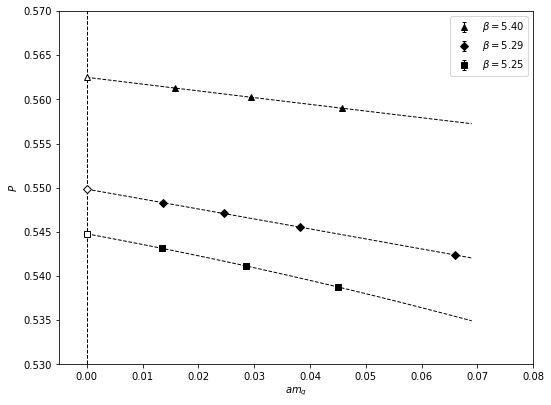

In [22]:

y_inter_line = np.arange(0.45, 0.75, 0.05)
x_inter_line = y_inter_line*0

axes = plt.gca()
axes.set_xlim([-0.005,0.08])
axes.set_ylim([0.53,0.57])

# plt.errorbar(amq20, P20, yerr=P20_err, color='k', linestyle='none', linewidth=1, marker="o", capsize=2)
# plt.plot(x, y20, 'k', linestyle='--', linewidth=1,)
# plt.errorbar(0, c20, yerr=c20_err, color='k', marker="o", markerfacecolor='w')

plt.errorbar(amq40, P40, yerr=P40_err, color='k', linestyle='none', linewidth=1, marker="^", capsize=2, label='$\\beta = 5.40$')
plt.plot(x, y40, 'k', linestyle='--', linewidth=1,)
plt.errorbar(0, c40, yerr=c40_err, color='k', marker="^", markerfacecolor='w')

plt.errorbar(amq29, P29, yerr=P29_err, color='k', linestyle='none', linewidth=1, marker="D", capsize=2, label='$\\beta = 5.29$')
plt.plot(x, y29, 'k', linestyle='--', linewidth=1,)
plt.errorbar(0, c29, yerr=c29_err, color='k', marker="D", markerfacecolor='w')

plt.errorbar(amq25, P25, yerr=P25_err, color='k', linestyle='none', linewidth=1, marker="s", capsize=2, label='$\\beta = 5.25$')
plt.plot(x, y25, 'k', linestyle='--', linewidth=1,)
plt.errorbar(0, c25, yerr=c25_err, color='k', marker="s", markerfacecolor='w')

# plt.plot(x, y, 'k', linestyle='--', linewidth=1,)
plt.plot(x_inter_line, y_inter_line, 'k', linestyle='--', linewidth=1,)
# plt.plot(0, c, 'k', marker="x")
plt.legend(loc='best')

plt.xlabel("$am_q$")
plt.ylabel("$P$")
# plt.title("$n_f = 0$")
fig = plt.gcf()
fig.set_size_inches(8.5, 6.5)

plt.show()
# fig.savefig("../plots/P_vs_amq.pdf")
# fig.savefig("../../../../LateX/plots/P_vs_amq.pdf")